#Dataset Generation

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
Fs = 16000

In [ ]:
music,_ = librosa.load('/content/drive/MyDrive/EE603-Project/Pritam_music.wav',sr=Fs)

In [ ]:
speech,_ = librosa.load('/content/drive/MyDrive/EE603-Project/Speech.wav',sr=Fs)

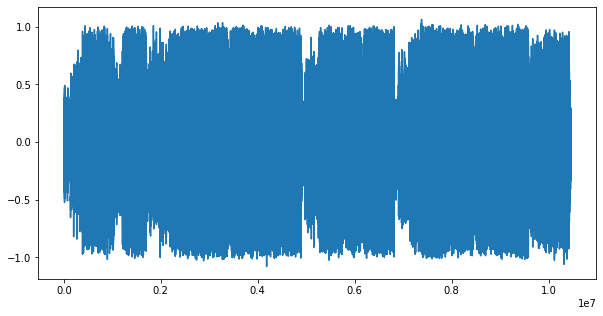

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.plot(music)

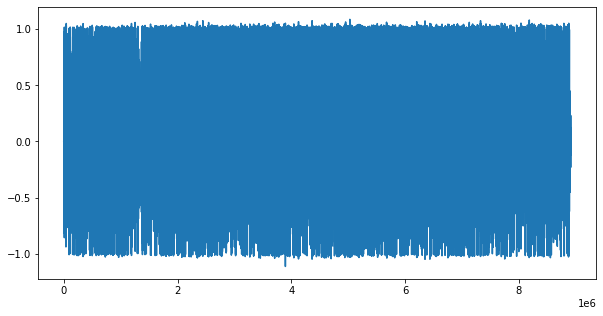

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(speech)

In [ ]:
import os

In [ ]:
pwd

'/content'

In [ ]:
!mkdir files

In [ ]:
%cd files

/content/files


In [ ]:
!pwd

/content/files


In [ ]:
import pandas as pd


In [ ]:
abs(2-3)

1

In [ ]:
i = 0
count = 0
onset = []
offset = []
filename = []
clas = []
while True:
  musicc = np.random.randint(1,5)
  speechc = np.random.randint(1,5)
  zeroc = 10-speechc-musicc
  musicl = musicc*Fs
  speechl = speechc*Fs
  zerol = zeroc*Fs


  if i+musicl >len(music) or i+speechl > len(speech):
    break
  else:
    fn = 'musph'+str(count)+'_.wav'
    x = np.zeros(zerol)
    m = music[i:i+musicl]
    s = speech[i:i+speechl]

    flag = np.random.randint(2)
    if(flag):

      mi = np.random.randint(len(x))
      if(abs(round(mi/Fs,4))>=0.025):
        onset.append(0)
        offset.append(round(mi/Fs,4))
        clas.append('silence')
        filename.append(fn)
      

      onset.append(round(mi/Fs,4))
      o = round(mi/Fs,4) + musicc
      offset.append(o)
      clas.append('music')
      filename.append(fn)
      x = np.insert(x,mi,m)

      
      si = np.random.randint(o*Fs,len(x))
      if(abs(o-round(si/Fs,4))>=0.025):
        onset.append(o)
        offset.append(round(si/Fs,4))
        clas.append('silence')
        filename.append(fn)

      
      onset.append(round(si/Fs,4))
      offset.append(round(si/Fs,4) + speechc)
      clas.append('speech')
      filename.append(fn)
      x = np.insert(x,si,s)

      if(abs(round(si/Fs,4) + speechc-10)>=0.025):
        onset.append(round(si/Fs,4) + speechc)
        offset.append(10)
        clas.append('silence')
        filename.append(fn)


    else :
      si = np.random.randint(len(x))
      if(abs(round(si/Fs,4))>=0.025):
        onset.append(0)
        offset.append(round(si/Fs,4))
        clas.append('silence')
        filename.append(fn)


      onset.append(round(si/Fs,4))
      o = round(si/Fs,4) + speechc
      offset.append(o)
      clas.append('speech')
      filename.append(fn)
      x = np.insert(x,si,s)

      

      mi = np.random.randint(o*Fs,len(x))
      if(abs(o-round(mi/Fs,4))>=0.025):
        onset.append(o)
        offset.append(round(mi/Fs,4))
        clas.append('silence')
        filename.append(fn)


      onset.append(round(mi/Fs,4))
      offset.append(round(mi/Fs,4) + musicc)
      clas.append('music')
      filename.append(fn)
      x = np.insert(x,mi,m)

      if(abs(round(mi/Fs,4) + musicc-10)>=0.025):
        onset.append(round(mi/Fs,4) + musicc)
        offset.append(10)
        clas.append('silence')
        filename.append(fn)
      

    sf.write(fn,x, Fs)

    i+= min(speechl,musicl)
    count+=1

    

In [ ]:
len(filename)

1453

In [ ]:
count

296

In [ ]:
df = pd.DataFrame()
df['filename'] = filename
df['onset'] = onset
df['offset'] = offset
df['class'] = clas

In [ ]:
df.iloc[500]

filename    musph101_.wav
onset              5.6063
offset             6.6063
class              speech
Name: 500, dtype: object

In [ ]:
df.head(50)

,filename,onset,offset,class
0,musph0_.wav,0.0000,3.8219,silence
1,musph0_.wav,3.8219,6.8219,music
2,musph0_.wav,6.8219,7.4842,silence
3,musph0_.wav,7.4842,8.4842,speech
4,musph0_.wav,8.4842,10.0000,silence
5,musph1_.wav,0.0000,5.0198,silence
6,musph1_.wav,5.0198,7.0198,speech
7,musph1_.wav,7.0198,7.7756,silence
8,musph1_.wav,7.7756,8.7756,music
9,musph1_.wav,8.7756,10.0000,silence


In [ ]:
df.to_csv('TrainLabels.csv',index = False)
print('Dataset Created!')

Dataset Created!
